# Integrales Numéricas

El cálculo integral es una de las principales ramas del cálculo y tiene numerosas aplicaciones en ciencia e ingeniería. Sin embargo, muchas funciones, sobre todo las que encontramos en aplicaciones prácticas, no tienen una antiderivada elemental o es muy complicado calcular su integral de manera exacta. Es aquí donde entran las técnicas de integración numérica.

La idea detrás de la integración numérica es aproximar el valor de una integral definida utilizando una suma finita. Esta aproximación puede basarse en diferentes estrategias y tener diferentes grados de precisión.


Consideraciones:
* Error y precisión: Siempre es esencial estimar el error de la aproximación. Algunos métodos proporcionan fórmulas para estimar el error, mientras que en otros casos, podrías tener que usar técnicas adicionales.

* Elección del método: La elección del método de integración numérica a utilizar depende en gran medida de la función que se esté integrando y del tipo de precisión que se requiera. Es posible que un método funcione mejor que otro para un problema particular.

# Empezamos:
Necesito calcular el area bajo la curva de la siguiente función, ¿Cómo lo hago?

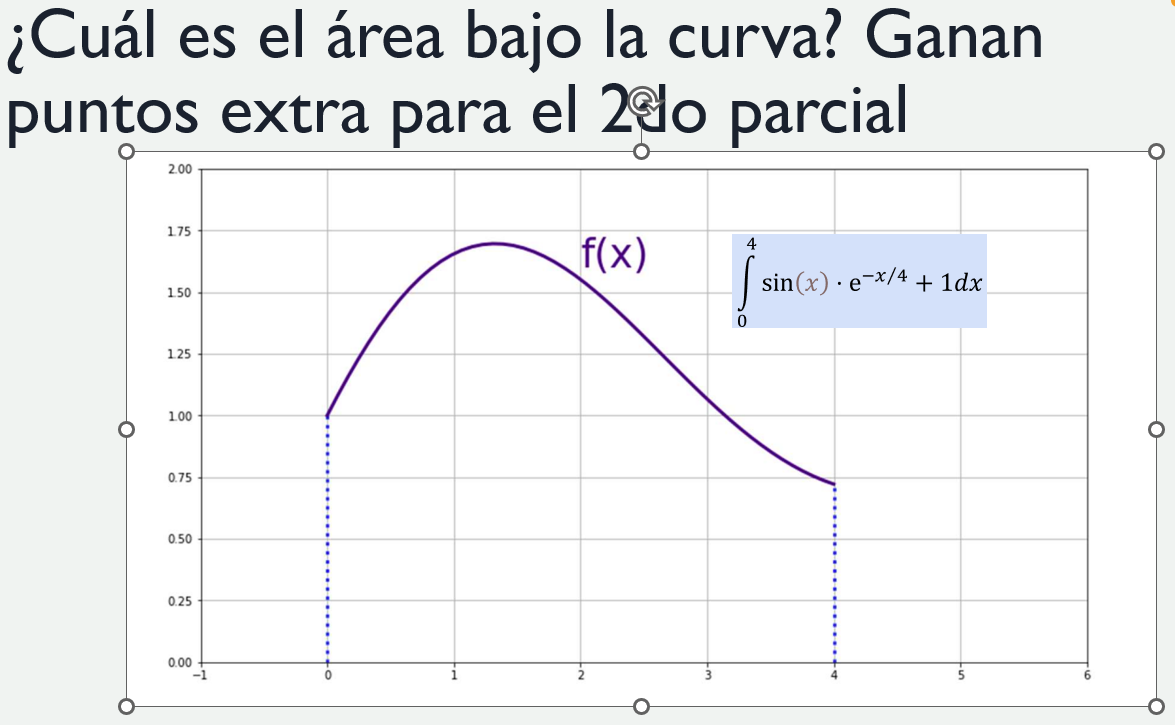

In [1]:
# librerías
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import sin,exp

In [ ]:
x_ = sy.Symbol('x_')
f_ = sin(x_)*exp(-x_/4) +1
f_

In [ ]:
area_real = sy.integrate(f_, (x_, 0, 4))
print(area_real)
print("...........")
area_real.evalf()

In [4]:
def f(x): return (np.sin(x)*np.exp(-x/4) +1)

In [5]:
x = np.linspace(0,4,20)
y = f(x)

## plt.fill_between

In [ ]:

limites_de_integracion = [0,4]

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

ax.vlines(x=limites_de_integracion[0], ymin=0, ymax=f(limites_de_integracion[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=limites_de_integracion[1], ymin=0, ymax=f(limites_de_integracion[1]) ,linewidth=3,linestyle=':',color='#2b30f1')


ax.text(2, 1.6, r'f(x)', fontsize=35,color='#4b0082')
ax.fill_between(x,f(x), where=[(x>=limites_de_integracion[0]) and (x<=limites_de_integracion[1]) for x in x], color='blue', alpha=0.1)

#ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

# 2. Punto Medio

In [7]:
## Vamos a utilizar bastantes Rectangle
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

limites_de_integracion = [0,4]
ax.vlines(x=limites_de_integracion[0], ymin=0, ymax=f(limites_de_integracion[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=limites_de_integracion[1], ymin=0, ymax=f(limites_de_integracion[1]) ,linewidth=3,linestyle=':',color='#2b30f1')


ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')

## Punto medio ---------------

punto_medio = (limites_de_integracion[1]-limites_de_integracion[0])/2
ax.vlines(x=punto_medio, ymin=0, ymax=f(punto_medio) ,linewidth=3,linestyle=':',color='#fb30f1')

ax.add_patch(
     patches.Rectangle(
        (limites_de_integracion[0], limites_de_integracion[0]),
        limites_de_integracion[1],
        f(punto_medio),
        #edgecolor = '#fb30f1',
        facecolor = '#fb30f1',
        alpha=0.3,
        fill=True
     ))

ax.scatter(punto_medio, f(punto_medio), s=254, marker='^', c='green')

ax.text(5.85, 1.6, "Punto medio", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Punto medio ---------------

ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

### Area con punto medio

In [35]:
#b*h

b = limites_de_integracion[1]-limites_de_integracion[0]
h = f(b/2)
area_punto_medio = b*h

# Método del trapecio

In [10]:
# ayuda de interpolación polinómica de Lagrange
from scipy.interpolate import lagrange

In [11]:
limites_de_integracion = [0,4]
# lagrange 1er orden
trapecio_x= limites_de_integracion
trapecio_y=[f(limites_de_integracion[0]),f(limites_de_integracion[1])]
p_trapecio = lagrange(trapecio_x,trapecio_y)

def recta_trapecio(x):
  return (p_trapecio[1]*x+p_trapecio[0])


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

limites_de_integracion = [0,4]
ax.vlines(x=limites_de_integracion[0], ymin=0, ymax=f(limites_de_integracion[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=limites_de_integracion[1], ymin=0, ymax=f(limites_de_integracion[1]) ,linewidth=3,linestyle=':',color='#2b30f1')



ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,f(x), where=[(x>=limites_de_integracion[0]) and (x<=limites_de_integracion[1]) for x in x], color='green', alpha=0.3)

## Trapecio ---------------


ax.plot(x,recta_trapecio(x),color='#ff0082', linewidth=3)


ax.fill_between(x,recta_trapecio(x), where=[(x>=limites_de_integracion[0]) and (x<=limites_de_integracion[1]) for x in x], color='#fb30f1', alpha=0.3)



ax.text(5.85, 1.6, "Trapecio", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Trapecio ---------------

ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

In [ ]:
area_trapecio = sy.integrate(recta_trapecio(x_), (x_, 0, 4))
print(area_trapecio)
print("...........")
area_trapecio.evalf()

# Simpson 1/3

In [23]:

seccion_interes=[0,4]
punto_medio=2


In [24]:
# lagrange 1er orden
simpson_x= [seccion_interes[0],punto_medio,seccion_interes[1]]
simpson_y=[f(seccion_interes[0]),f(punto_medio),f(seccion_interes[1])]
p_2 = lagrange(simpson_x,simpson_y)


def curva_simpson(x):
  return (p_2[2]*x**2+p_2[1]*x+p_2[0])

In [ ]:
curva_simpson(x)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [0,4]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=f(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=f(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')



ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,f(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Trapecio ---------------


ax.plot(x,curva_simpson(x),color='#ff0082', linewidth=3)


ax.fill_between(x,curva_simpson(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='#fb30f1', alpha=0.3)



ax.text(5.85, 1.6, "Simpson", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Trapecio ---------------

ax.scatter(simpson_x, simpson_y, s=84, marker='o', c='black')


ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

In [ ]:
area_simpson = sy.integrate(curva_simpson(x_), (x_, 0, 4))
print(area_simpson)
print("...........")
area_simpson.evalf()

# Simpson 3/8

In [28]:
simpson38_x = np.linspace(seccion_interes[0],seccion_interes[1],4)
simpson38_y = f(simpson38_x)
p_38 = lagrange(simpson38_x,simpson38_y)

In [29]:

def curva_simpson38(x):
  return (p_38[3]*x**3+p_38[2]*x**2+p_38[1]*x+p_38[0])

In [ ]:
p_38[3]*x_**3+p_38[2]*x_**2+p_38[1]*x_+p_38[0]

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [0,4]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=f(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=f(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')



ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,f(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Trapecio ---------------


ax.plot(x,curva_simpson38(x),color='#ff0082', linewidth=3)


ax.fill_between(x,curva_simpson38(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='#fb30f1', alpha=0.3)



ax.text(5.85, 1.6, "Simpson 3/8", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Trapecio ---------------

ax.scatter(simpson38_x, simpson38_y, s=84, marker='o', c='black')


ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

In [ ]:
area_simpson38 = sy.integrate(curva_simpson38(x_), (x_, 0, 4))
print(area_simpson38)
print("...........")
str(area_simpson38.evalf())

## Conclusiones

In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame con las columnas especificadas
data = {
    'función':['sin(x_)*exp(-x_/4) +1'],
    'integral': [area_real.evalf()],
    'punto_medio': [area_punto_medio],
    'trapecio': [area_trapecio.evalf()],
    'Simpson': [area_simpson.evalf()],
    'Simpson_3/8': [area_simpson38.evalf()],
    'serie_punto_medio': [np.nan],  # Valores NaN
    'serie_trapecio': [np.nan]       # Valores NaN
}

pd.DataFrame(data)

